In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import gzip
from collections import defaultdict

threads = defaultdict(list)
ptrs = {}
with gzip.open("../../Games/vcmi/build/malloc.log.gz") as fin:
    for line in fin:
        parts = line[:-1].split(b"\t")
        thread = int(parts[1])
        size = int(parts[2])
        ptr = parts[3]
        if size > -1:
            threads[thread].append(size.bit_length())
            ptrs[ptr] = size
        else:
            size = ptrs.get(ptr, 0)
            if size > 0:
                del ptrs[ptr]
            threads[thread].append(32 + size.bit_length())

In [8]:
items = []
for _, t in threads.items():
    items.extend(t)

In [11]:
len(items)

19409405

In [13]:
items = array(items)

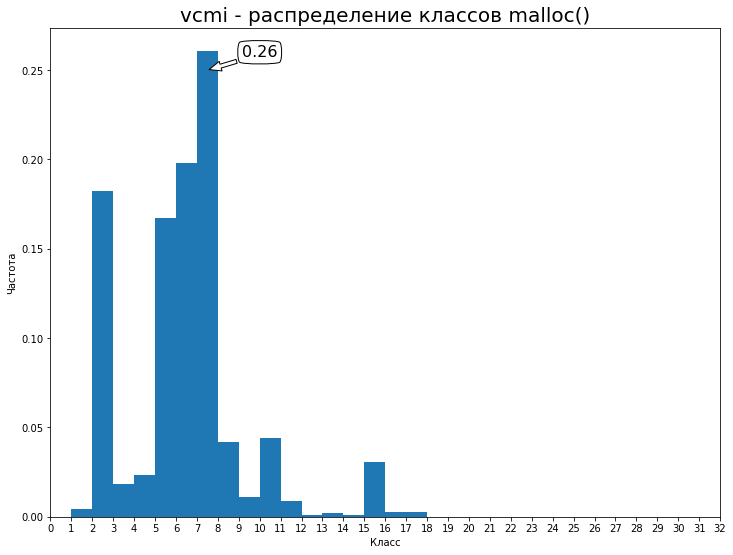

In [67]:
rcParams["figure.figsize"] = (12, 9)
xticks(arange(33))
xlim(0, 32)
freqs, _, _ = hist(items[items < 32], bins=arange(32), normed=True)
title("vcmi - распределение классов malloc()", fontsize=20)
xlabel("Класс")
ylabel("Частота")
annotate("0.26", xy=(7.5, 0.25), xytext=(10, 0.26), fontsize=16, va="center", ha="center",
         bbox=dict(boxstyle="round4", fc="white"),
         arrowprops=dict(edgecolor="black", facecolor="white",
                         shrink=0.05, width=4, headwidth=10, connectionstyle="arc3"))

In [30]:
freqs[7] / freqs.sum()

0.26077458552120703